# __Dissertation__
## __Automated Diagnosis of COVID-19 using Medical Imagery__

_Alister George Luiz (agl2)_

_H00310537_

_Year IV_

_Heriot-Watt University_

### __Mount Google Drive__

In [ ]:
# Importing Google Drive Folders
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### __Importing Essential Libraries__

In [ ]:
# Install necessary libraries (Uncomment to download)

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install cv2
!pip install PIL
!pip install sklearn
!pip install skimage
!pip install scipy
!pip install tensorflow
!pip install keras-unet
!pip install seaborn
!pip install keras-unet-collection
!pip install torchviz
!pip install imageio

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
  Using cached https://files.pythonhosted.org/packages/3b/ee/edbfa69ba7b7d9726e634bfbeefd04b5a1764e9e74867ec916113eeaf4a1/skimage-0.0.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [ ]:
# Importing Required Python Libraries
import os
from collections import Counter
import pickle
import glob
import h5py
import shutil
import random
import json

# Importing Required Python Libraries
import numpy as np
import cv2    
import pandas as pd  
from PIL import Image
import imageio

# Importing Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cms
import matplotlib.image as mpimg
import seaborn as sns

# Importing Scikit-Learn's Libraries
from sklearn.utils import class_weight, shuffle
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, plot_confusion_matrix, multilabel_confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from skimage import measure, morphology
from skimage.transform import resize
from sklearn.cluster import KMeans

# Importing Tensorflow and Keras Libraries
import tensorflow as tf 
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint, Callback
from tensorflow.keras.models import load_model 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Softmax, Activation, Dense, Dropout
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# CT Scan Segmentation Imports
from keras_unet.models import vanilla_unet
from keras_unet_collection import models as kerasModels

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


### __Colab Performance Essentials__

In [ ]:
# Imports to check GPU configuration
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# Other essential imports
import glob
import numpy as np
import h5py
import cv2

In [ ]:
# TPU Setup Code
use_tpu = True #@param {type:"boolean"}

if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''
  
# Model specific parameters

# TPU address
tpu_address = TF_MASTER

# Number of epochs
epochs = 50

# Number of steps_per_epoch
steps_per_epoch = 5

# NOTE: Total number of training steps = Number of epochs * Number of steps_per_epochs

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.59.208.226:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.59.208.226:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
# If GPU shared run the code to kill other processes
# !kill -9 -1

### __Utility Functions__

In [ ]:
def display_training_curves(training, validation, title):
    """
    Display's trends in training parameters such 
    as Loss and Accuracy.
    """
    plt.plot(training)
    plt.plot(validation)
    plt.title('Model ' + title.capitalize())
    plt.ylabel(title.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    """
    Defines the Grad-CAM saliency map technique.
    Identifies the pixels which contribute the most to the classification.
    Code excerpt taken from:
    https://keras.io/examples/vision/grad_cam/
    """
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    # Returns the heatmap and the index of the most probable class
    return heatmap, top_pred_index.numpy()

In [ ]:
def superimposed_img(image, heatmap, imageSize):
    """
    Superimposes the Grad-CAM heatmap with the original 
    image.
    Code excerpt taken from:
    https://keras.io/examples/vision/grad_cam/
    """
    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cms.get_cmap("jet")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((imageSize, imageSize))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.4 + image
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img

In [ ]:
def displayScans(imgDir, noToDisplay, scanName, scanType):
  """
  Function to display subplots of scans 
  belonging to certain class
  """
  plt.figure(figsize=(10,10))
  for i in range(noToDisplay):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(imgDir + "/" + scanName, scanType[i])),cmap='gray')
    plt.title(scanName)
  plt.show()

In [ ]:
def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
    if title:
        plt.title(title)

### __Callback Set Up__

In [ ]:
# Set up learning rate reduction and early stopping
lrReduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.0001, patience=8, verbose=1)
esCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=1)

## __X-Ray Scans__

#### __Loading Data__

In [ ]:
# !unzip 'drive/MyDrive/DissertationDataset/Data.zip' -d 'drive/MyDrive/DissertationDataset/'

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(345).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(346).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(347).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(348).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(349).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(35).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(350).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(351).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(352).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(353).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(354).jpg  
  inflating: drive/MyDrive/Dissertati

In [ ]:
# Move 11% (approx. 52) of X-Ray Scans from each class to test folder (11th Fold)
# fromDir = "drive/MyDrive/DissertationDataset/Data/train" 
# toDir = "drive/MyDrive/DissertationDataset/Data/test"

# classesDir = ["COVID19", "NORMAL", "PNEUMONIA"]

# for i in classesDir:
#   files = [f for f in os.listdir(os.path.join(fromDir, i))]
#   randomSample = random.sample(files, 52)
#   for j in randomSample:
#     shutil.move(os.path.join(os.path.join(fromDir, i), j), os.path.join(toDir, i))

In [ ]:
# Keep only 520 images from each of the 3 classes
# !find 'drive/MyDrive/DissertationDataset/Data/train/COVID19' -type f -print0 | sort -zR | tail -zn +521 | xargs -0 rm
# !find 'drive/MyDrive/DissertationDataset/Data/train/NORMAL' -type f -print0 | sort -zR | tail -zn +521 | xargs -0 rm
# !find 'drive/MyDrive/DissertationDataset/Data/train/PNEUMONIA' -type f -print0 | sort -zR | tail -zn +521 | xargs -0 rm

In [ ]:
# dataPathTrain = 'drive/MyDrive/DissertationDataset/Data/train/*/*.jpg'
# dataPathTest = 'drive/MyDrive/DissertationDataset/Data/test/*/*.jpg'
# # Get all the image paths 
# addrsTrain = glob.glob(dataPathTrain)
# addrsTest = glob.glob(dataPathTest)

In [ ]:
def getData(paths):
  """
    Function iterates through all the images present in the folder path and 
    generates two numpy arrays, one for the image and another for their 
    respective labels for model training purposes.
  """
  X = []
  Y = []
  for i, j in enumerate(paths):
    img=cv2.imread(j, cv2.IMREAD_COLOR) 
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(224, 224), interpolation=cv2.INTER_AREA)
    X.append(img)
    if ('NORMAL' in j):
      Y.append('NORMAL')
    elif ('COVID19' in j):
      Y.append('COVID19')
    else:
      Y.append('PNEUMONIA')
    print('Processed: ' + str(i + 1) + '/' + str(len(paths)))
  return np.array(X), np.array(Y)

In [ ]:
# XTrain, YTrain = getData(addrsTrain)

Processed: 1/1560
Processed: 2/1560
Processed: 3/1560
Processed: 4/1560
Processed: 5/1560
Processed: 6/1560
Processed: 7/1560
Processed: 8/1560
Processed: 9/1560
Processed: 10/1560
Processed: 11/1560
Processed: 12/1560
Processed: 13/1560
Processed: 14/1560
Processed: 15/1560
Processed: 16/1560
Processed: 17/1560
Processed: 18/1560
Processed: 19/1560
Processed: 20/1560
Processed: 21/1560
Processed: 22/1560
Processed: 23/1560
Processed: 24/1560
Processed: 25/1560
Processed: 26/1560
Processed: 27/1560
Processed: 28/1560
Processed: 29/1560
Processed: 30/1560
Processed: 31/1560
Processed: 32/1560
Processed: 33/1560
Processed: 34/1560
Processed: 35/1560
Processed: 36/1560
Processed: 37/1560
Processed: 38/1560
Processed: 39/1560
Processed: 40/1560
Processed: 41/1560
Processed: 42/1560
Processed: 43/1560
Processed: 44/1560
Processed: 45/1560
Processed: 46/1560
Processed: 47/1560
Processed: 48/1560
Processed: 49/1560
Processed: 50/1560
Processed: 51/1560
Processed: 52/1560
Processed: 53/1560
Pr

In [ ]:
# XTrain.shape, YTrain.shape

((1560, 224, 224, 3), (1560,))

In [ ]:
# XTest, YTest = getData(addrsTest)

Processed: 1/156
Processed: 2/156
Processed: 3/156
Processed: 4/156
Processed: 5/156
Processed: 6/156
Processed: 7/156
Processed: 8/156
Processed: 9/156
Processed: 10/156
Processed: 11/156
Processed: 12/156
Processed: 13/156
Processed: 14/156
Processed: 15/156
Processed: 16/156
Processed: 17/156
Processed: 18/156
Processed: 19/156
Processed: 20/156
Processed: 21/156
Processed: 22/156
Processed: 23/156
Processed: 24/156
Processed: 25/156
Processed: 26/156
Processed: 27/156
Processed: 28/156
Processed: 29/156
Processed: 30/156
Processed: 31/156
Processed: 32/156
Processed: 33/156
Processed: 34/156
Processed: 35/156
Processed: 36/156
Processed: 37/156
Processed: 38/156
Processed: 39/156
Processed: 40/156
Processed: 41/156
Processed: 42/156
Processed: 43/156
Processed: 44/156
Processed: 45/156
Processed: 46/156
Processed: 47/156
Processed: 48/156
Processed: 49/156
Processed: 50/156
Processed: 51/156
Processed: 52/156
Processed: 53/156
Processed: 54/156
Processed: 55/156
Processed: 56/156
P

In [ ]:
# XTest.shape, YTest.shape

((156, 224, 224, 3), (156,))

In [ ]:
# XTrain, YTrain = shuffle(XTrain, YTrain, random_state=0)
# XTest, YTest = shuffle(XTest, YTest, random_state=0)

In [ ]:
# Find total length
# len(XTrain), len(XTest), len(YTrain), len(YTest) 

(1560, 156, 1560, 156)

In [ ]:
# Find length per class
# len(YTrain[YTrain == 'COVID19']), len(YTrain[YTrain == 'NORMAL']),len(YTrain[YTrain == 'PNEUMONIA'])

(520, 520, 520)

In [ ]:
# Find length per class
# len(YTest[YTest == 'COVID19']), len(YTest[YTest == 'NORMAL']),len(YTest[YTest == 'PNEUMONIA'])

(52, 52, 52)

In [ ]:
# Save arrays for faster loading
# with open('drive/MyDrive/DissertationDataset/XTrain.npy', 'wb') as f:
#     np.save(f, XTrain)

# with open('drive/MyDrive/DissertationDataset/XTest.npy', 'wb') as f:
#     np.save(f, XTest)

# with open('drive/MyDrive/DissertationDataset/YTrain.npy', 'wb') as f:
#     np.save(f, YTrain)

# with open('drive/MyDrive/DissertationDataset/YTest.npy', 'wb') as f:
#     np.save(f, YTest)

In [ ]:
# Code above commented as Processed Dataset saved as .npy files, saves processing time!
# Load the saved dataset
with open('drive/MyDrive/DissertationDataset/XTrain.npy', 'rb') as f:
  XTrain = np.load(f)

with open('drive/MyDrive/DissertationDataset/XTest.npy', 'rb') as f:
  XTest = np.load(f)

with open('drive/MyDrive/DissertationDataset/YTrain.npy', 'rb') as f:
  YTrain = np.load(f)

with open('drive/MyDrive/DissertationDataset/YTest.npy', 'rb') as f:
  YTest = np.load(f)

In [ ]:
# Setting Image Size
imageSize = 224 


### __Pretrained CNN__

_Utilizes Transfer Learning Technique._

A pretrained CNN model on the ImageNet dataset is used to compromise for the limited dataset size.



Augmentation Complete!
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
16/16 [==============================] - 22s 839ms/step - loss: 300.0706 - accuracy: 0.4542 - val_loss: 3.8948 - val_accuracy: 0.6987
Epoch 2/50
16/16 [==============================] - 2s 123ms/step - loss: 2.0903 - accuracy: 0.7922 - val_loss: 0.6173 - val_accuracy: 0.9167
Epoch 3/50
16/16 [==============================] - 2s 115ms/step - loss: 0.3320 - accuracy: 0.9077 - val_loss: 0.3811 - val_accuracy: 0.8846
Epoch 4/50
16/16 [==============================] - 2s 126ms/step - loss: 0.2070 - accuracy: 0.9281 - val_loss: 0.2941 - val_accuracy: 0.9295
Epoch 5/50
16/16 [==============================] - 2s 115ms/step - loss: 0.1478 - accuracy: 0.9442 - val_loss: 0.2864 - val_accuracy: 0.9295
Epoch 6/50
16/16 [==============================] - 2s 111ms/step - loss: 0.0990 - accuracy: 0.9668 - val_loss: 0.3003 - val_accuracy: 0.9359
Epoch 7/50
16/16 [=====

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     COVID19       1.00      0.02      0.04        52
      NORMAL       0.00      0.00      0.00        52
   PNEUMONIA       0.34      1.00      0.50        52

    accuracy                           0.34       156
   macro avg       0.45      0.34      0.18       156
weighted avg       0.45      0.34      0.18       156


 Results on Unseen Data: 

              precision    recall  f1-score   support

     COVID19       0.00      0.00      0.00        52
      NORMAL       0.00      0.00      0.00        52
   PNEUMONIA       0.33      1.00      0.50        52

    accuracy                           0.33       156
   macro avg       0.11      0.33      0.17       156
weighted avg       0.11      0.33      0.17       156



Augmentation Complete!
------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/50
16/16 [==============================] - 22s 844ms/step - loss: 278.5524 - ac

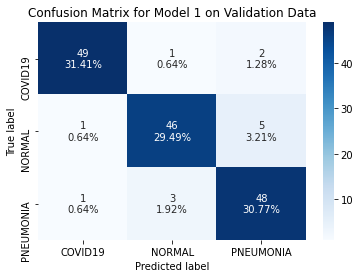

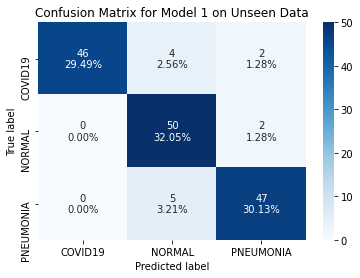

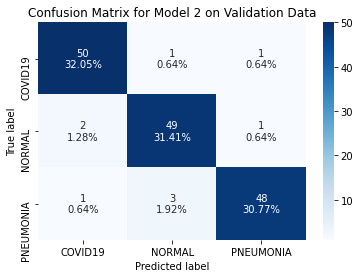

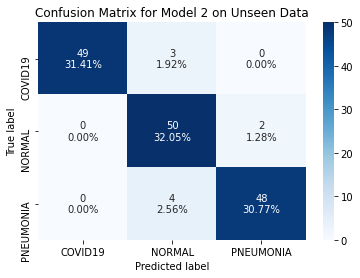

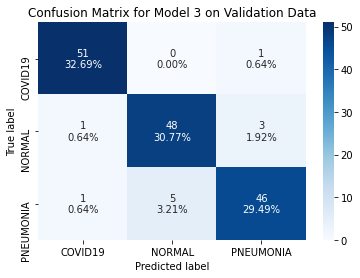

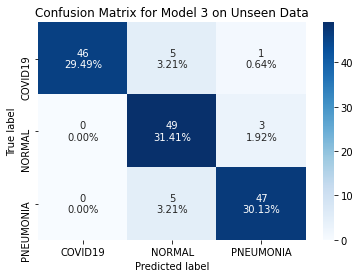

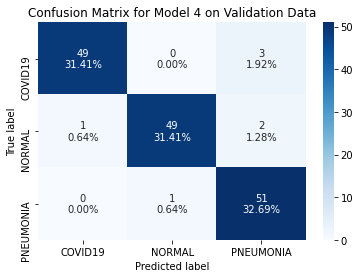

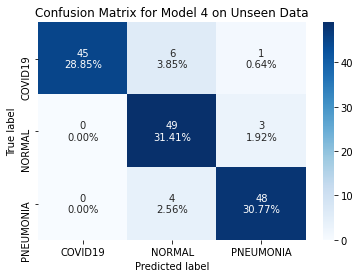

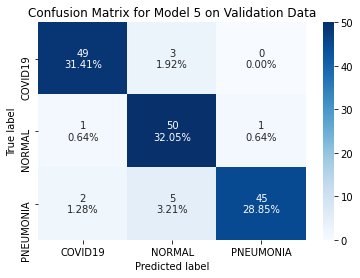

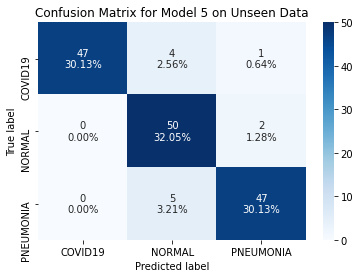

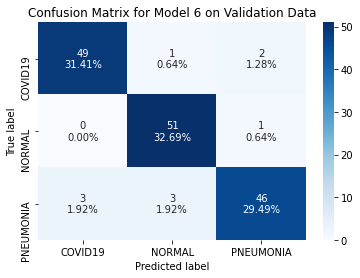

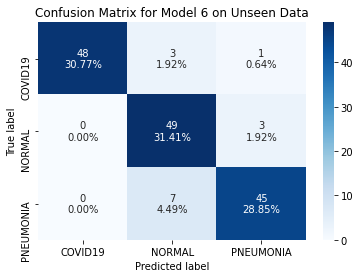

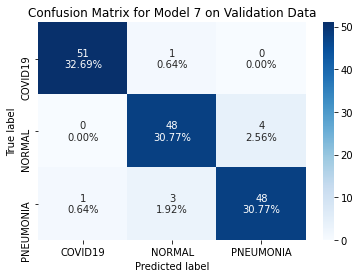

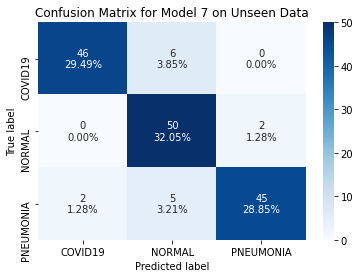

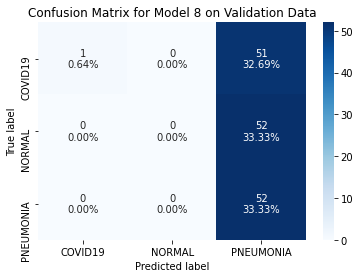

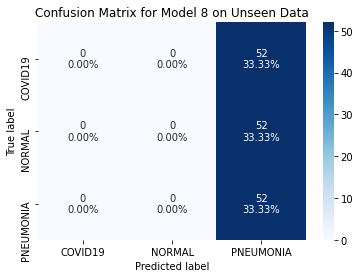

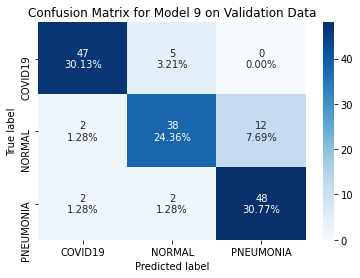

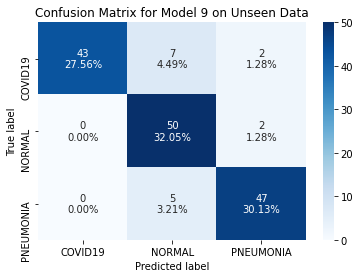

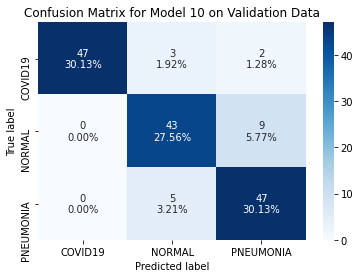

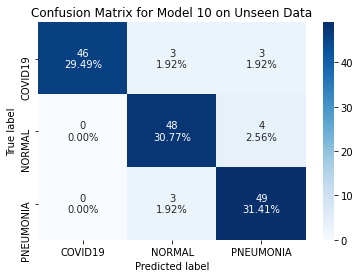

In [ ]:
# Setup StratifiedKFold Cross Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accPerFold = []
lossPerFold = []
# K-fold Cross Validation for Model Training
foldNo = 1
# Initialize Label Encoder to encode Target Labels 
le = LabelEncoder()
for train, test in kfold.split(XTrain, YTrain):
  # Data Augmentation
  covidCount = 0
  pneuCount = 0
  normCount = 0

  augmentedDataX = []
  augmentedDataY = []
  
  numAugmented = 0
  # Augmentation Parameters taken from: https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae
  trainDatagen = ImageDataGenerator(rotation_range = 5, shear_range = 0.02, zoom_range = 0.02, samplewise_center=True, samplewise_std_normalization= True)

  # Use Data Augmentation to generate 600 Images per class
  for XBatch, YBatch in trainDatagen.flow(XTrain[train], YTrain[train], batch_size=1, shuffle=False):
    if (YBatch == 'COVID19'):
      if (covidCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        covidCount += 1
    elif (YBatch == 'PNEUMONIA'):
      if (pneuCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        pneuCount += 1
    else:
      if (normCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        normCount += 1
    numAugmented += 1
    if numAugmented == 1800:
      print("\n\nAugmentation Complete!")
      break

  # Concatenate Augmented Data
  augmentedDataX = np.concatenate(augmentedDataX)
  augmentedDataY = np.concatenate(augmentedDataY)
  augmentedDataX = np.concatenate((augmentedDataX, XTrain[train]), axis=0)
  augmentedDataY = np.concatenate((augmentedDataY, YTrain[train]), axis=0)
  
  # Encode Target Labels
  YCatAug = tf.keras.utils.to_categorical(le.fit_transform(augmentedDataY))
  YCatVal = tf.keras.utils.to_categorical(le.fit_transform(YTrain[test]))

  # Begin Training
  with strategy.scope():
   # Load pre-trained model to apply Transfer Learning
   modelCNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(imageSize, imageSize, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(3,  activation=tf.nn.softmax)
    ])
   # Compile the Model
   modelCNN.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {foldNo} ...')

  # Fit data to model and save the best model to Google Drive
  historyCNN = modelCNN.fit(augmentedDataX, YCatAug, validation_data = (XTrain[test], YCatVal), callbacks=[lrReduce, esCallback], epochs=50, batch_size=210)

  # Generate generalization metrics
  scores = modelCNN.evaluate(XTrain[test], YCatVal, verbose=0)
  print(f'Score for fold {foldNo}: {modelCNN.metrics_names[0]} of {scores[0]}; {modelCNN.metrics_names[1]} of {scores[1]*100}%')
  accPerFold.append(scores[1] * 100)
  lossPerFold.append(scores[0])

  # Increase fold number
  foldNo = foldNo + 1
  
  print('\n Results on Validation Data: \n')
  # Print out Fold Results, Classification Report, and Confusion Matrix on Validation Data
  predict = modelCNN.predict(XTrain[test])
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  for j in YCatVal:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(foldNo - 1) + ' on Validation Data')

  print('\n Results on Unseen Data: \n')
  # Print out Fold Results, Classification Report, and Confusion Matrix on Unseen Data
  predict = modelCNN.predict(XTest)
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  YCatTest = tf.keras.utils.to_categorical(le.fit_transform(YTest))
  for j in YCatTest:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(foldNo - 1) + ' on Unseen Data')

In [ ]:
# Average 10-Fold Cross Validation Accuracy
np.mean(accPerFold)

86.15384668111801

In [ ]:
# Average 10-Fold Cross Validation Loss
np.mean(lossPerFold)

0.5291603624820709

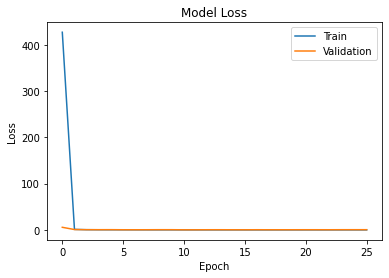

In [ ]:
# Plot Trends in Loss
display_training_curves(historyCNN.history['loss'], historyCNN.history['val_loss'], 'loss')

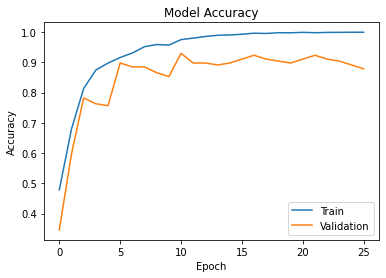

In [ ]:
# Plot Trends in Accuracy
display_training_curves(historyCNN.history['accuracy'], historyCNN.history['val_accuracy'], 'accuracy')

## __CT Scans__

### __Loading Data__

In [ ]:
# !unzip 'drive/MyDrive/DissertationDataset/Preprocessed CT scans.zip' -d 'drive/MyDrive/DissertationDataset/CTData/train'

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9081.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9082.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9083.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9084.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9085.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9086.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9087.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9088.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9089.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT909.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9090.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9091.jpg  
  inflating: d

In [ ]:
# Move 11th fold (approx. 363) of X-Ray Scans from each class to test folder
# fromDir = "drive/MyDrive/DissertationDataset/CTData/train" 
# toDir = "drive/MyDrive/DissertationDataset/CTData/test"

# classesDir = ["nCT", "pCT"]

# for i in classesDir:
#   files = [f for f in os.listdir(os.path.join(fromDir, i))]
#   randomSample = random.sample(files, 363)
#   for j in randomSample:
#     shutil.move(os.path.join(os.path.join(fromDir, i), j), os.path.join(toDir, i))

In [ ]:
# Remove NiCT Folder
# shutil.rmtree('drive/MyDrive/DissertationDataset/CTData/train/NiCT')

In [ ]:
# Keep only 3630 images from each of the 2 Non COVID-19 classes
# !find 'drive/MyDrive/DissertationDataset/CTData/train/pCT' -type f -print0 | sort -zR | tail -zn +3631 | xargs -0 rm
# !find 'drive/MyDrive/DissertationDataset/CTData/train/nCT' -type f -print0 | sort -zR | tail -zn +3631 | xargs -0 rm

In [ ]:
# dataPathTrain = 'drive/MyDrive/DissertationDataset/CTData/train/*/*.jpg'
# dataPathTest = 'drive/MyDrive/DissertationDataset/CTData/test/*/*.jpg'
# # Get all the image paths 
# addrsTrain = glob.glob(dataPathTrain)
# addrsTest = glob.glob(dataPathTest)

In [ ]:
def getData(paths):
  """
    Function iterates through all the images present in the folder path and 
    generates two numpy arrays, one for the image and another for their 
    respective labels for model training purposes.
  """
  X = []
  Y = []
  for i, j in enumerate(paths):
    img=cv2.imread(j, cv2.IMREAD_COLOR) 
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(128, 128), interpolation=cv2.INTER_AREA)
    X.append(img)
    if ('pCT' in j):
      Y.append('COVID19')
    else:
      Y.append('NORMAL')
    print('Processed: ' + str(i + 1) + '/' + str(len(paths)))
  return np.array(X), np.array(Y)

In [ ]:
# XTrain, YTrain = getData(addrsTrain)

Streaming output truncated to the last 5000 lines.
Processed: 2261/7260
Processed: 2262/7260
Processed: 2263/7260
Processed: 2264/7260
Processed: 2265/7260
Processed: 2266/7260
Processed: 2267/7260
Processed: 2268/7260
Processed: 2269/7260
Processed: 2270/7260
Processed: 2271/7260
Processed: 2272/7260
Processed: 2273/7260
Processed: 2274/7260
Processed: 2275/7260
Processed: 2276/7260
Processed: 2277/7260
Processed: 2278/7260
Processed: 2279/7260
Processed: 2280/7260
Processed: 2281/7260
Processed: 2282/7260
Processed: 2283/7260
Processed: 2284/7260
Processed: 2285/7260
Processed: 2286/7260
Processed: 2287/7260
Processed: 2288/7260
Processed: 2289/7260
Processed: 2290/7260
Processed: 2291/7260
Processed: 2292/7260
Processed: 2293/7260
Processed: 2294/7260
Processed: 2295/7260
Processed: 2296/7260
Processed: 2297/7260
Processed: 2298/7260
Processed: 2299/7260
Processed: 2300/7260
Processed: 2301/7260
Processed: 2302/7260
Processed: 2303/7260
Processed: 2304/7260
Processed: 2305/7260
Proc

In [ ]:
# XTrain.shape, YTrain.shape

((7260, 128, 128, 3), (7260,))

In [ ]:
# XTest, YTest = getData(addrsTest)

Processed: 1/726
Processed: 2/726
Processed: 3/726
Processed: 4/726
Processed: 5/726
Processed: 6/726
Processed: 7/726
Processed: 8/726
Processed: 9/726
Processed: 10/726
Processed: 11/726
Processed: 12/726
Processed: 13/726
Processed: 14/726
Processed: 15/726
Processed: 16/726
Processed: 17/726
Processed: 18/726
Processed: 19/726
Processed: 20/726
Processed: 21/726
Processed: 22/726
Processed: 23/726
Processed: 24/726
Processed: 25/726
Processed: 26/726
Processed: 27/726
Processed: 28/726
Processed: 29/726
Processed: 30/726
Processed: 31/726
Processed: 32/726
Processed: 33/726
Processed: 34/726
Processed: 35/726
Processed: 36/726
Processed: 37/726
Processed: 38/726
Processed: 39/726
Processed: 40/726
Processed: 41/726
Processed: 42/726
Processed: 43/726
Processed: 44/726
Processed: 45/726
Processed: 46/726
Processed: 47/726
Processed: 48/726
Processed: 49/726
Processed: 50/726
Processed: 51/726
Processed: 52/726
Processed: 53/726
Processed: 54/726
Processed: 55/726
Processed: 56/726
P

In [ ]:
# XTest.shape, YTest.shape

((726, 128, 128, 3), (726,))

In [ ]:
# XTrain, YTrain = shuffle(XTrain, YTrain, random_state=0)
# XTest, YTest = shuffle(XTest, YTest, random_state=0)

In [ ]:
# Find total length
# len(XTrain), len(XTest), len(YTrain), len(YTest) 

(7260, 726, 7260, 726)

In [ ]:
# Find length per class
# len(YTrain[YTrain == 'COVID19']), len(YTrain[YTrain == 'NORMAL'])

(3630, 3630)

In [ ]:
# Find length per class
# len(YTest[YTest == 'COVID19']), len(YTest[YTest == 'NORMAL'])

(363, 363)

In [ ]:
# Save arrays for faster loading
# with open('drive/MyDrive/DissertationDataset/XTrainCT.npy', 'wb') as f:
#     np.save(f, XTrain)

# with open('drive/MyDrive/DissertationDataset/XTestCT.npy', 'wb') as f:
#     np.save(f, XTest)

# with open('drive/MyDrive/DissertationDataset/YTrainCT.npy', 'wb') as f:
#     np.save(f, YTrain)

# with open('drive/MyDrive/DissertationDataset/YTestCT.npy', 'wb') as f:
#     np.save(f, YTest)

In [ ]:
# Code above commented as Processed Dataset saved as .npy files, saves processing time!
# Load the saved dataset
with open('drive/MyDrive/DissertationDataset/XTrainCT.npy', 'rb') as f:
  XTrain = np.load(f)

with open('drive/MyDrive/DissertationDataset/XTestCT.npy', 'rb') as f:
  XTest = np.load(f)

with open('drive/MyDrive/DissertationDataset/YTrainCT.npy', 'rb') as f:
  YTrain = np.load(f)

with open('drive/MyDrive/DissertationDataset/YTestCT.npy', 'rb') as f:
  YTest = np.load(f)

In [ ]:
# Setting Image Size
imageSize = 128

### __Pretrained CNN__

_Utilizes Transfer Learning Technique._

A pretrained CNN model on the ImageNet dataset is used to compromise for the limited dataset size.



Augmentation Complete!
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
11/11 [==============================] - 9s 505ms/step - loss: 10.2402 - accuracy: 0.5410 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - 1s 93ms/step - loss: 0.6808 - accuracy: 0.5069 - val_loss: 0.6758 - val_accuracy: 0.4986
Epoch 3/50
11/11 [==============================] - 1s 94ms/step - loss: 0.6726 - accuracy: 0.4989 - val_loss: 0.6645 - val_accuracy: 0.5427
Epoch 4/50
11/11 [==============================] - 2s 194ms/step - loss: 0.6655 - accuracy: 0.5371 - val_loss: 0.6585 - val_accuracy: 0.5510
Epoch 5/50
11/11 [==============================] - 1s 93ms/step - loss: 0.6604 - accuracy: 0.5447 - val_loss: 0.6527 - val_accuracy: 0.5592
Epoch 6/50
11/11 [==============================] - 1s 91ms/step - loss: 0.6552 - accuracy: 0.5513 - val_loss: 0.6471 - val_accuracy: 0.5675
Epoch 7/50
11/11 [===========

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in long_scalars


              precision    recall  f1-score   support

     COVID19       0.50      1.00      0.67       363
      NORMAL       0.00      0.00      0.00       363

    accuracy                           0.50       726
   macro avg       0.25      0.50      0.33       726
weighted avg       0.25      0.50      0.33       726


 Results on Unseen Data: 

              precision    recall  f1-score   support

     COVID19       0.50      1.00      0.67       363
      NORMAL       0.00      0.00      0.00       363

    accuracy                           0.50       726
   macro avg       0.25      0.50      0.33       726
weighted avg       0.25      0.50      0.33       726



Augmentation Complete!
------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/50
11/11 [==============================] - 10s 566ms/step - loss: 26.1002 - accuracy: 0.5068 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - 

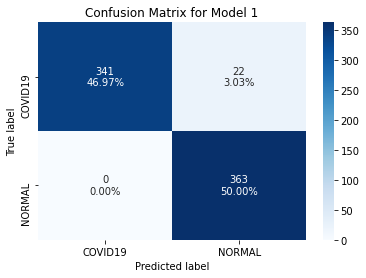

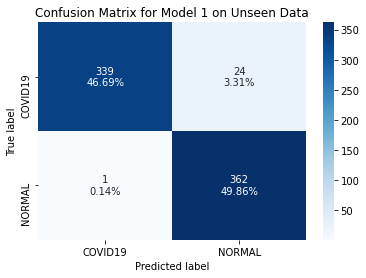

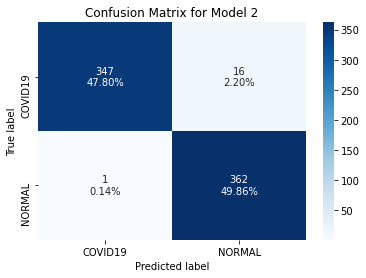

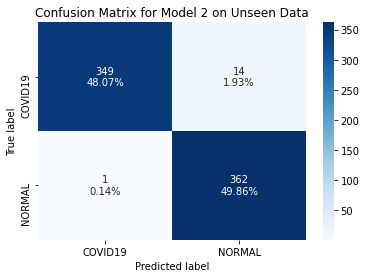

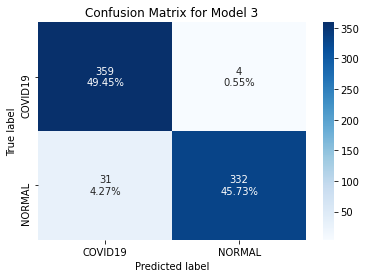

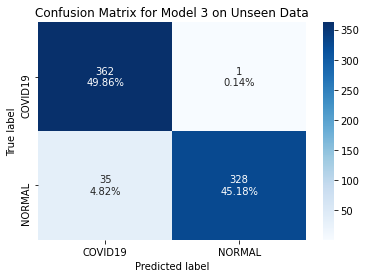

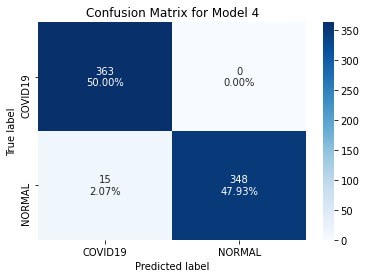

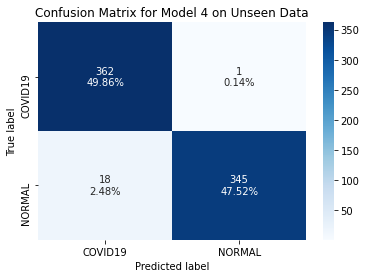

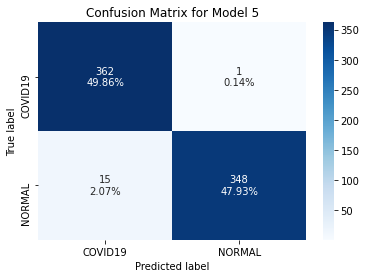

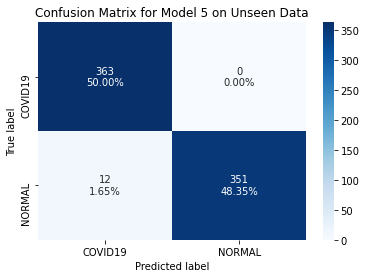

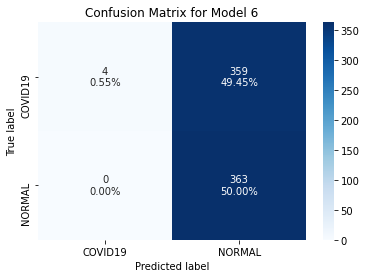

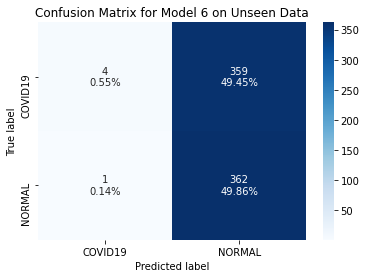

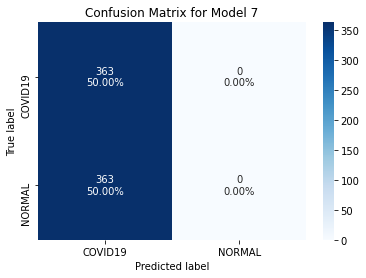

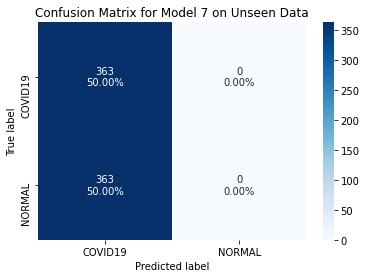

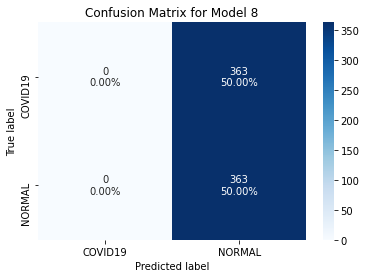

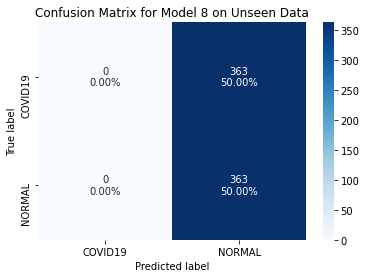

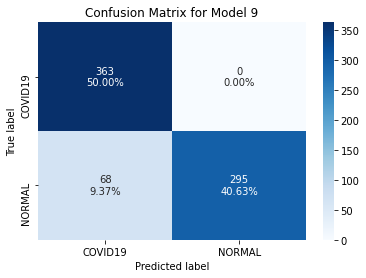

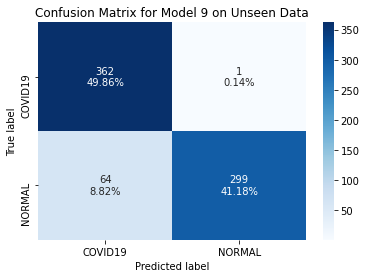

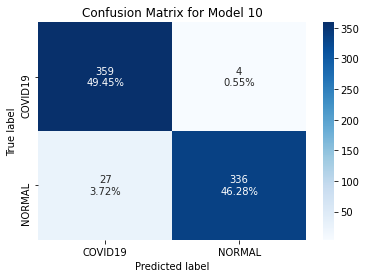

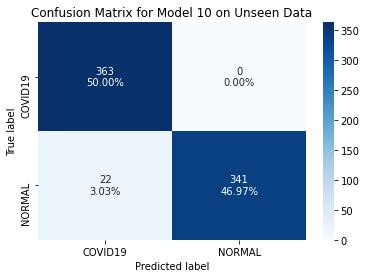

In [ ]:
# Setup StratifiedKFold Cross Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accPerFold = []
lossPerFold = []
# K-fold Cross Validation for Model Training
foldNo = 1
# Initialize Label Encoder to encode Target Labels 
le = LabelEncoder()
for train, test in kfold.split(XTrain, YTrain):
  # Data Augmentation
  covidCount = 0
  normCount = 0

  augmentedDataX = []
  augmentedDataY = []
  
  numAugmented = 0
  # Augmentation Parameters taken from: https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae
  trainDatagen = ImageDataGenerator(rotation_range = 5, shear_range = 0.02, zoom_range = 0.02, samplewise_center=True, samplewise_std_normalization= True)

  # Use Data Augmentation to generate 2000 Images per class
  for XBatch, YBatch in trainDatagen.flow(XTrain[train], YTrain[train], batch_size=1, shuffle=False):
    if (YBatch == 'COVID19'):
      if (covidCount == 2000):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        covidCount += 1
    else:
      if (normCount == 2000):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        normCount += 1
    numAugmented += 1
    if numAugmented == 4000:
      print("\n\nAugmentation Complete!")
      break

  # Concatenate Augmented Data
  augmentedDataX = np.concatenate(augmentedDataX)
  augmentedDataY = np.concatenate(augmentedDataY)
  augmentedDataX = np.concatenate((augmentedDataX, XTrain[train]), axis=0)
  augmentedDataY = np.concatenate((augmentedDataY, YTrain[train]), axis=0)
  
  # Encode Target Labels
  YCatAug = tf.keras.utils.to_categorical(le.fit_transform(augmentedDataY))
  YCatVal = tf.keras.utils.to_categorical(le.fit_transform(YTrain[test]))
  # Begin Training
  with strategy.scope():
    # Load pre-trained model to apply Transfer Learning
    modelCNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(imageSize, imageSize, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(2,  activation='sigmoid')
    ])
    # Compile the Model
    modelCNN.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {foldNo} ...')

  # Fit data to model and save the best model to Google Drive
  historyCNN = modelCNN.fit(augmentedDataX, YCatAug, validation_data = (XTrain[test], YCatVal), callbacks=[esCallback, lrReduce], epochs=50, batch_size=1024)

  # Generate generalization metrics
  scores = modelCNN.evaluate(XTrain[test], YCatVal, verbose=0)
  print(f'Score for fold {foldNo}: {modelCNN.metrics_names[0]} of {scores[0]}; {modelCNN.metrics_names[1]} of {scores[1]*100}%')
  accPerFold.append(scores[1] * 100)
  lossPerFold.append(scores[0])

  # Increase fold number
  foldNo = foldNo + 1

  # Print out Fold Results, Classification Report, and Confusion Matrix on Validation Data
  predict = modelCNN.predict(XTrain[test])
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  for j in YCatVal:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(foldNo - 1))

  
  print('\n Results on Unseen Data: \n')
  # Print out Fold Results, Classification Report, and Confusion Matrix on Unseen Data
  predict = modelCNN.predict(XTest)
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  YCatTest = tf.keras.utils.to_categorical(le.fit_transform(YTest))
  for j in YCatTest:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(foldNo - 1) + ' on Unseen Data')

In [ ]:
# Average 10-Fold Cross Validation Accuracy
np.mean(accPerFold)

82.24518060684204

In [ ]:
# Average 10-Fold Cross Validation Loss
np.mean(lossPerFold)

0.3369216926395893

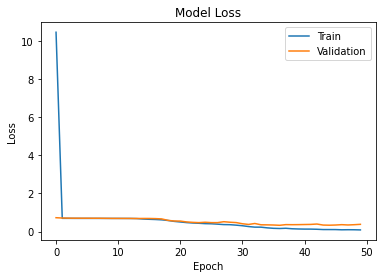

In [ ]:
# Plot Trends in Loss
display_training_curves(historyCNN.history['loss'], historyCNN.history['val_loss'], 'loss')

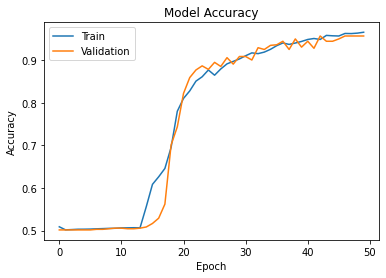

In [ ]:
# Plot Trends in Accuracy
display_training_curves(historyCNN.history['accuracy'], historyCNN.history['val_accuracy'], 'accuracy')